In [1]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 15]
from collections import Counter
import nltk 
from nltk.corpus import stopwords
from collections import Counter
import numpy as np

In [2]:
# Read the data and do some preprocessing:
df = pd.read_csv('raw.csv')
df = df.replace('\n', ' ', regex=True)
df.drop(df.columns[0], axis=1, inplace=True)
df.rename(columns={'0':'job_title', '1':'company_name', '2':'location', '3':'workplace_type', '4':'job_posted', '5':'job_desc'}, inplace=True)
df.job_desc = df.job_desc.apply(lambda x: x.replace(',', ''))
df.to_csv('linkedin_jobs.csv')

print(df.dtypes)
print('Number of missing values:\n', df.isnull().sum())
print('Number of duplicates:',df.duplicated().sum())
len(df)
 

job_title         object
company_name      object
location          object
workplace_type    object
job_posted        object
job_desc          object
dtype: object
Number of missing values:
 job_title           0
company_name        0
location            0
workplace_type    312
job_posted          0
job_desc            0
dtype: int64
Number of duplicates: 13


725

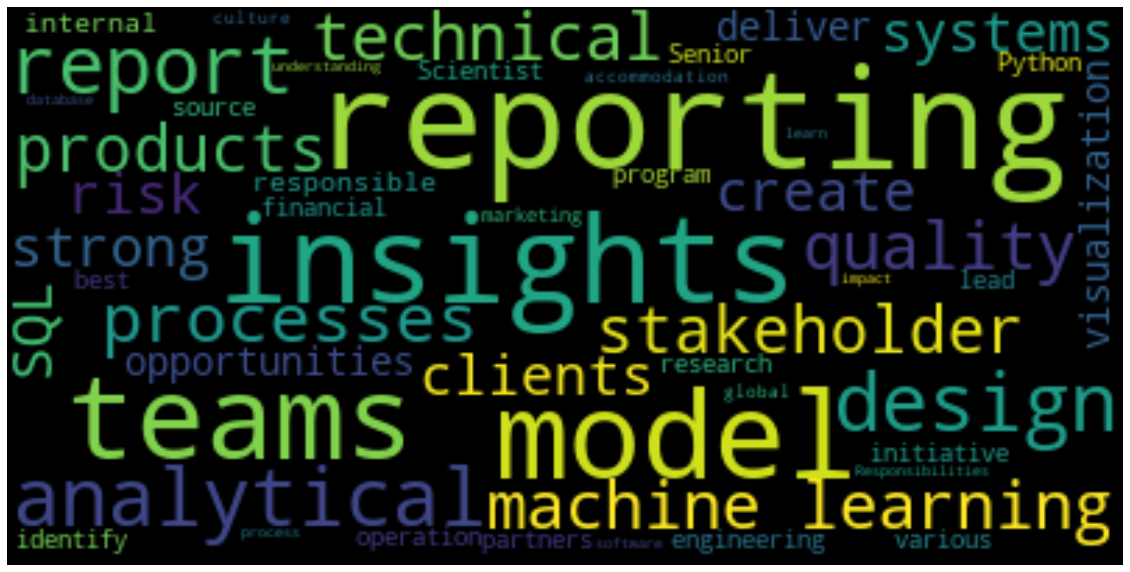

In [3]:
# Stopwords:
text = df.job_desc.values
stopwords=set(STOPWORDS)
stopwords.update(['data', 'team', 'solution', 'experience', 'service', 'develop', 'product', 're', 'support', 'will', 'client', 'development', 'employee', 
'experience', 'client', 'work', 'tool', 'required', 's', 'insight', 'role', 'customers', 'business', 'analyst', 'analytic', 'analysis', 'analytic', 'requirement'
,'analytics', 'project', 'well', 'information', 'including', 'company', 'knowledge', 'year', 'requirements', 'canada', 'employees', 'people', 'partner',
'committed', 'management', 'skill', 'grow','ability', 'help', 'need', 'environment', 'working', 'skills' ,'u', 'provide' , 'system', 'technology','projects',
'solutions', 'years', 'tools', 'build', 'building', 'new', 'customer', 'et' ,'us', 'within', 'organization', 'career', 'meet', 'needs', 'value', 'quality'
'products', 'services', 'world', 'etc', 'using', 'use', 'drive', 'make', 'one', 'related', 'ensure', 'understand', 'bring', 'part', 'relevant', 'member', 'looking'
, 'join', 'across', 'll', 'application', 'performance', 'know', 'asset', 'job', 'based', 'result', 'platform', 'position', 'de', 'td', 'members', 'science', 'offer',
'time', 'key', 'description', 'group'])

# Create and generate a word cloud image:
wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, max_words=50).generate(str(text))

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [4]:
def sort_bar(dict):
    sort = sorted(dict.items(),key=lambda item:item[1], reverse=True)
    dictsort = {k: v for k, v in sort}

    # Plot:
    keys = (dictsort.keys())
    values = (dictsort.values())
    plt.bar(keys, values)
    plt.show()  

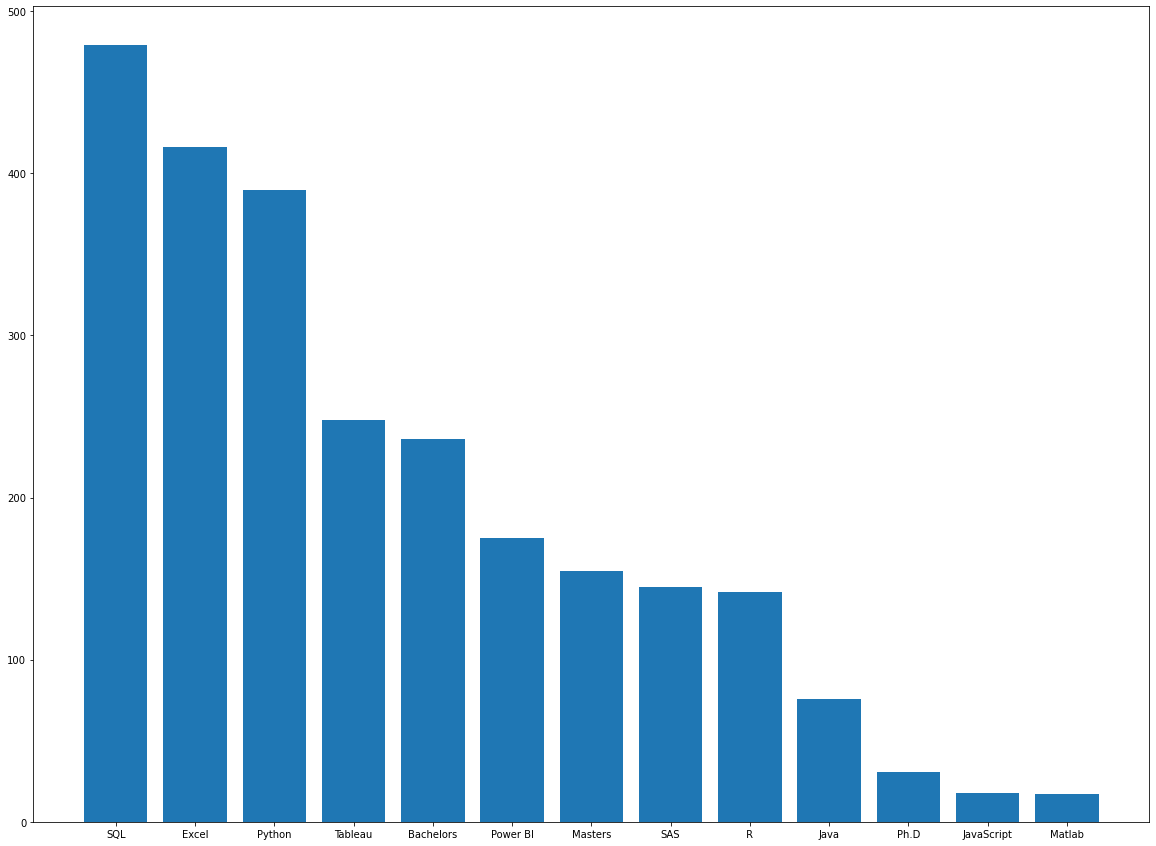

In [5]:
# Get count of instances of keywords:
keylist=['Power BI', 'PowerBI', 'Tableau', 'Python', ' R ', 'Excel', 'Matlab', 'SAS', 'Java', 'JavaScript', 'Masters', 'SQL',
'Bachelors', 'Master', 'Bachelor', 'PhD', 'Ph.D']
dict={}

for keyword in range(0,len(keylist)):
    count=df.job_desc.str.contains(keylist[keyword], case=False).sum()
    dict[keylist[keyword]]=count

# Sum counts of permutation of words:
pbi = dict.get('Power BI')+dict.get('PowerBI')
dict.update({'Power BI':pbi})
dict.pop('PowerBI', None)

bac = dict.get('Bachelors')+dict.get('Bachelor')
dict.update({'Bachelors':bac})
dict.pop('Bachelor', None)

mas = dict.get('Masters')+dict.get('Master')
dict.update({'Masters':mas})
dict.pop('Master', None)

phd = dict.get('Ph.D')+dict.get('PhD')
dict.update({'Ph.D':phd})
dict.pop('PhD', None)

sort_bar(dict)

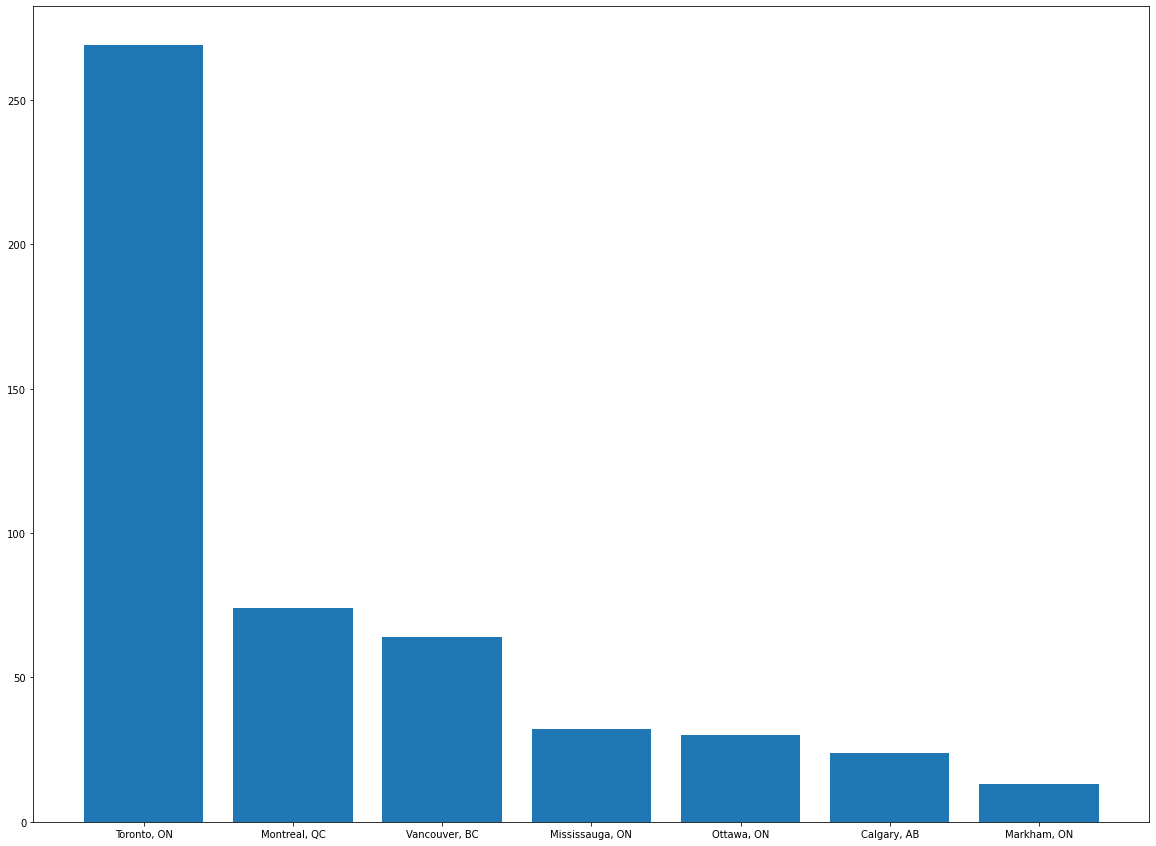

In [6]:
# Where companies are located
counter=Counter(df.location)
locdict=Counter({k: c for k, c in counter.items() if c >= 10})
pop=['Canada','Ontario, Canada', 'Greater Toronto Area, Canada']

for key in pop:
    locdict.pop(key,None)
    
sort_bar(locdict)

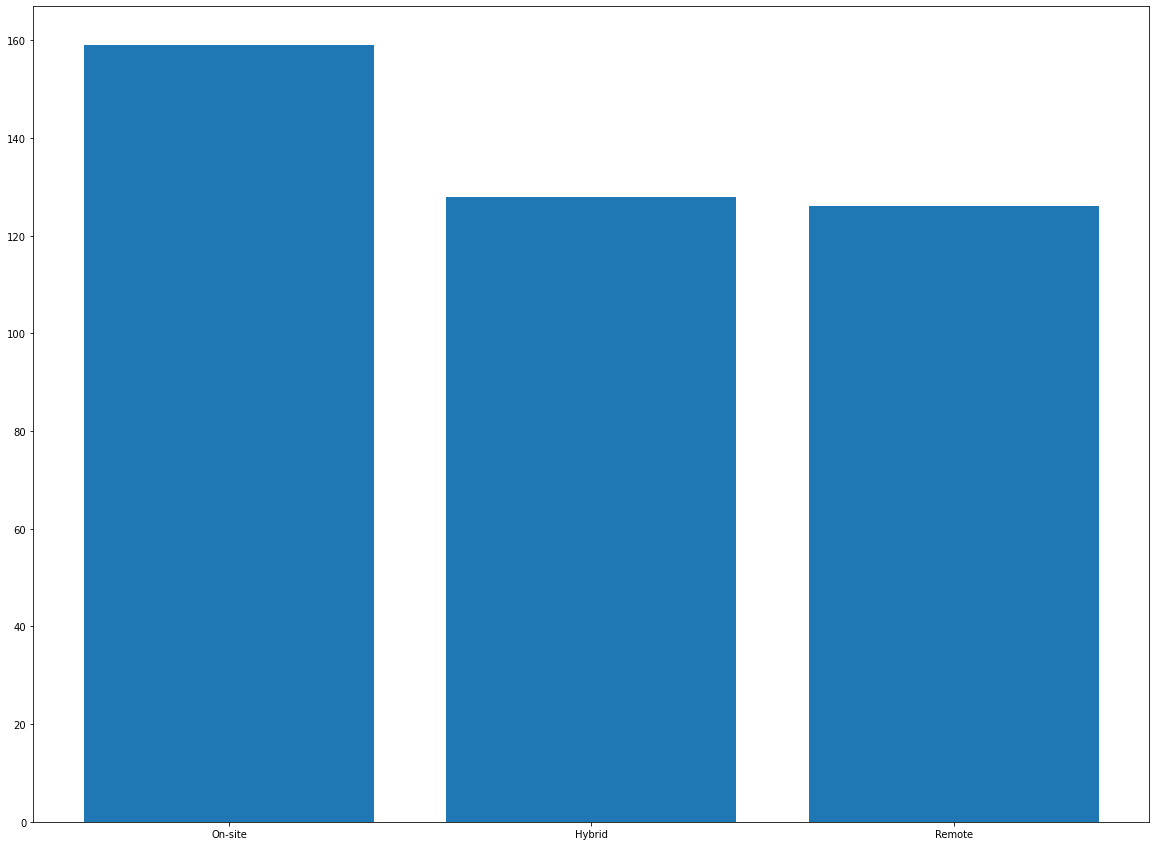

In [7]:
# Type of workplace location
wpdict=Counter(df.workplace_type)
clean_dict = {k: v for k, v in wpdict.items() if k == k}
sort_bar(clean_dict)